In [173]:
import os
import json
from pprint import pprint
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
from config import api_key, g_key, second_key
import gmaps
from pylab import figure, axes, pie, title, show

In [18]:
#Read in procurement data
federal_overview = pd.read_csv("Federal_Overview.csv")

federal_overview

,Unnamed: 0,Business Name,Address,City,State,Zip,Country,Number of Actions,Dollars Obligated,Per Capita Spending,Range of Actions,Lat,Lon,Cong. Dis.,Senator 1,Senator 2,Representative,Party 1,Party 2,Party 3
0,0,LOCKHEED MARTIN CORPORATION,700 N FREDERICK AVE,GAITHERSBURG,MD,20879,USA,58430,4.866580e+10,832890.58,"10,000-99,999",39.143969,-77.201606,6.0,Ben Cardin (D),Chris Van Hollen (D),David Trone (D),D,D,D
1,1,"BOEING COMPANY, THE",3373 BRECKINRIDGE BLVD,RICHARDSON,TX,75082,USA,18765,2.808870e+10,1496866.72,"10,000-99,999",32.948334,-96.729852,3.0,John Cornyn (R),Ted Cruz (R),Van Taylor (R),R,R,R
2,2,RAYTHEON COMPANY,5001 US HIGHWAY 30 W,FORT WAYNE,IN,46818,USA,12662,1.635078e+10,1291326.96,"10,000-99,999",41.079273,-85.139351,3.0,Todd Young (R),Mike Braun (R),Jim Banks (R),R,R,R
3,3,MCKESSON CORPORATION,6555 STATE HIGHWAY 161,IRVING,TX,75039,USA,82167,9.640425e+09,117327.21,"10,000-99,999",32.814018,-96.948894,24.0,John Cornyn (R),Ted Cruz (R),Kenny Marchant (R),R,R,R
4,4,"LEIDOS HOLDINGS, INC.",1750 PRESIDENTS ST,RESTON,VA,20190,USA,4830,7.272381e+09,1505669.05,"1,000-9,999",38.958631,-77.357003,11.0,Mark Warner (D),Tim Kaine (D),Gerry Connolly (D),D,D,D
5,5,FLUOR CORPORATION,6700 LAS COLINAS BLVD,IRVING,TX,75039,USA,364,5.254247e+09,14434744.08,"Under 1,000",32.814018,-96.948894,24.0,John Cornyn (R),Ted Cruz (R),Kenny Marchant (R),R,R,R
6,6,BOOZ ALLEN HAMILTON HOLDING CORPORATION,8283 GREENSBORO DR,MCLEAN,VA,22102,USA,5731,5.146754e+09,898055.10,"1,000-9,999",38.933868,-77.177260,11.0,Mark Warner (D),Tim Kaine (D),Gerry Connolly (D),D,D,D
7,7,JACOBS ENGINEERING GROUP INC.,200 W FORSYTH ST STE 1520,JACKSONVILLE,FL,32202,USA,3630,3.345955e+09,921750.56,"1,000-9,999",30.332184,-81.655651,5.0,Marco Rubio (R),Rick Scott (R),Al Lawson (D),R,R,D
8,8,OSHKOSH CORPORATION,1917 FOUR WHEEL DR,OSHKOSH,WI,54902,USA,13577,2.884559e+09,212459.21,"10,000-99,999",44.024706,-88.542614,6.0,Ron Johnson (R),Tammy Baldwin (D),Glenn Grothman (R),R,D,R
9,9,TEXTRON INC.,13800 OLD GENTILLY RD BLDG 220,NEW ORLEANS,LA,70129,USA,5483,1.719904e+09,313679.33,"1,000-9,999",29.951066,-90.071532,2.0,Bill Cassidy (R),John Kennedy (R),Cedric Richmond (D),R,R,D


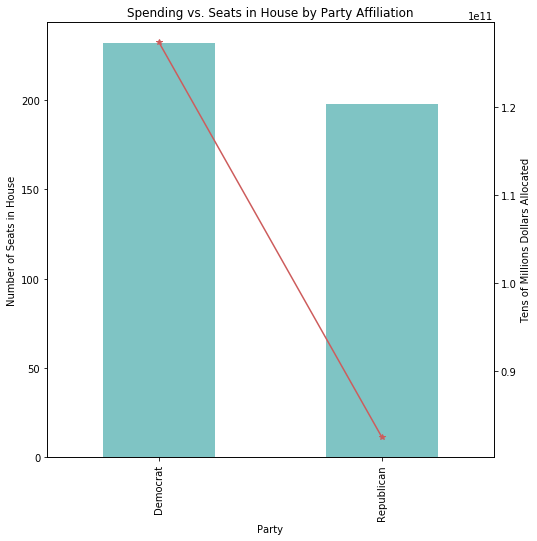

In [291]:
check_one = pd.DataFrame(federal_overview.groupby("Party 3")[["Dollars Obligated", "Number of Actions"]].sum())
current_house = pd.DataFrame([["Democrat",232],["Republican", 198]], columns = ["Party", "Seats"])
check_one["Party"] = ["Democrat", "Republican"]
check_two = pd.merge(current_house, check_one, on = "Party")
# check_two["Dollars Obligated"] = check_two["Dollars Obligated"].astype(float).map("${:,.2f}".format)
check_two = check_two.set_index("Party")
fig = plt.figure()
ax = check_two["Seats"].plot(kind='bar', color = "darkcyan", alpha = .5, figsize=(8, 8))
ax.set_ylabel("Number of Seats in House")
ax.set_xlabel('Party')
ax.set_title("Spending vs. Seats in House by Party Affiliation")
ax2 = ax.twinx()
ax2.set_ylabel("Tens of Millions Dollars Allocated")
ax2 = check_two["Dollars Obligated"].plot(kind="line", color = "indianred", marker = "*");
fig.savefig("Spending by Party.png")

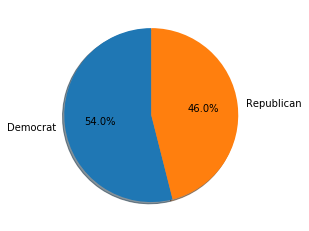

In [93]:
plt.pie(current_house[1], labels = ["Democrat", "Republican"], autopct="%1.1f%%", shadow=True, startangle=90);

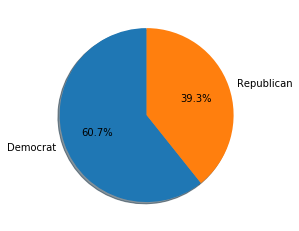

In [95]:
plt.pie(check_one,labels = ["Democrat", "Republican"], autopct="%1.1f%%", shadow=True, startangle=90);


In [248]:
#configuring map coordinates
gmaps.configure(api_key=g_key)

locations = federal_overview[["Lat", "Lon"]].astype(float)
weights = federal_overview["Dollars Obligated"]
money = federal_overview["Dollars Obligated"].astype(float).map("${:,.2f}".format)

In [245]:
fig = gmaps.figure()

dollars_spent = gmaps.heatmap_layer(locations, weights=weights, dissipating=True, max_intensity=10,point_radius = 5)
                                

fig.add_layer(dollars_spent)

fig

Figure(layout=FigureLayout(height='420px'))

In [251]:
info_box_template = """
<dl>
<dt>Company Name</dt><dd>{Business Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>State</dt><dd>{State}</dd>
<dt>Dollars Allocated</dt><dd>{Dollars Obligated}</dd>
</dl>
"""
company_info = [info_box_template.format(**row) for index, row in federal_overview.iterrows()]
locations = federal_overview[["Lat", "Lon"]]

info_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale = 1,
    info_box_content= company_info
)

fig.add_layer(info_layer)
fig

Figure(layout=FigureLayout(height='420px'))